<a href="https://colab.research.google.com/github/rizqyjoe/Facial_Expression_Recognition_CNN_VGG16/blob/main/35%25_Acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import Libraries
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Input,Dense
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input as pi
from keras.optimizers import Adam
from keras import optimizers

print(keras.__version__)

2.4.3


In [ ]:
num_classes =7
image_resize = 48
batch_size_training = 64
batch_size_validation = 64

path_training = '/content/drive/MyDrive/Dataset/FER2013/images/train'
path_validation = '/content/drive/MyDrive/Dataset/FER2013/images/validation'

In [31]:
data_generator =ImageDataGenerator(
    preprocessing_function = pi
)

In [32]:
training_generator = data_generator.flow_from_directory(
    path_training,
    target_size = (image_resize,image_resize),
    batch_size = batch_size_training,
    class_mode='categorical')

Found 28831 images belonging to 7 classes.


In [33]:
validation_generator = data_generator.flow_from_directory(
    path_validation,
    target_size = (image_resize,image_resize),
    batch_size = batch_size_validation,
    class_mode='categorical',
)

Found 7066 images belonging to 7 classes.


In [34]:
model = Sequential()

In [35]:
model.add(VGG16(
    include_top = False,
    pooling='avg',
    weights='imagenet',
))

In [36]:
model.add(Dense(num_classes,activation='softmax'))

In [37]:
model.layers[0].layers

In [38]:
model.layers[0].trainable = False

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 3591      
Total params: 14,718,279
Trainable params: 3,591
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [41]:
steps_per_epoch_training = len(training_generator)/batch_size_training
steps_per_epoch_validation = len(validation_generator)/batch_size_validation
num_epochs = 25

In [42]:
fit_history = model.fit(
    training_generator,
    steps_per_epoch = steps_per_epoch_training,
    epochs = num_epochs,
    validation_data=validation_generator,
    validation_steps = steps_per_epoch_validation,
    verbose=1)

Epoch 1/25
7/7 [==============================] - 202s 30s/step - loss: 15.4843 - acc: 0.1827 - val_loss: 11.9398 - val_acc: 0.1953
Epoch 2/25
7/7 [==============================] - 186s 28s/step - loss: 12.3471 - acc: 0.1916 - val_loss: 10.8136 - val_acc: 0.1328
Epoch 3/25
7/7 [==============================] - 195s 29s/step - loss: 10.5785 - acc: 0.1900 - val_loss: 9.2326 - val_acc: 0.1953
Epoch 4/25
7/7 [==============================] - 164s 24s/step - loss: 9.4688 - acc: 0.2151 - val_loss: 9.6646 - val_acc: 0.1797
Epoch 5/25
7/7 [==============================] - 175s 26s/step - loss: 9.3152 - acc: 0.2531 - val_loss: 8.5374 - val_acc: 0.2109
Epoch 6/25
7/7 [==============================] - 167s 25s/step - loss: 7.9110 - acc: 0.2556 - val_loss: 9.3985 - val_acc: 0.2031
Epoch 7/25
7/7 [==============================] - 164s 24s/step - loss: 7.8505 - acc: 0.2210 - val_loss: 7.1586 - val_acc: 0.2734
Epoch 8/25
7/7 [==============================] - 163s 24s/step - loss: 7.8003 - acc:

In [43]:
%cd /content/drive/MyDrive/CP
model.save('FER2013_classifier_VGG16_epoch_model.h5')

[Errno 2] No such file or directory: '/content/drive/MyDrive/CP'
/content


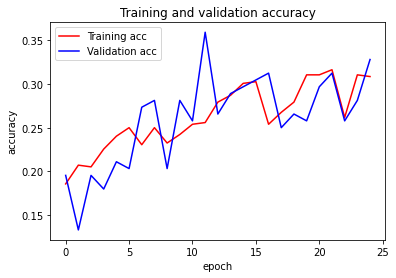

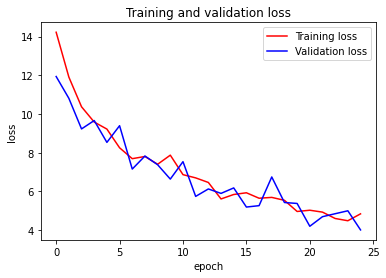

In [46]:
#show graphing

accuracy = fit_history.history['acc']
val_accuracy = fit_history.history['val_acc']
loss = fit_history.history['loss']
val_loss = fit_history.history['val_loss']
num_epochs = range(len(accuracy))
plt.plot(num_epochs, accuracy, 'r', label='Training acc')
plt.plot(num_epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(num_epochs, loss, 'r', label='Training loss')
plt.plot(num_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()